In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, os, glob

# old

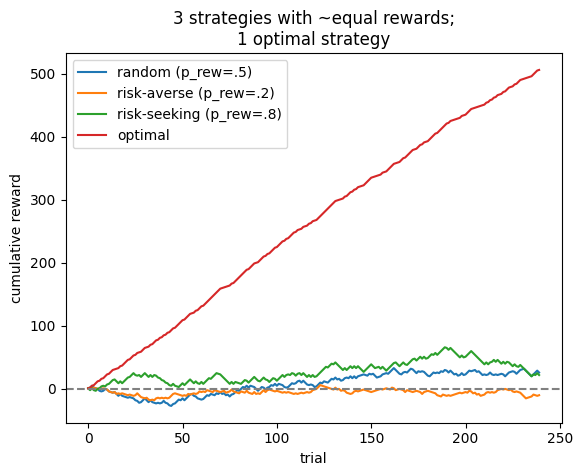

In [2]:
strategies = {'random (p_rew=.5)': 0.5, 'risk-averse (p_rew=.2)': 0.2, 'risk-seeking (p_rew=.8)': 0.8, 'optimal': 'optimal'}

n_trials = 240
stim = np.random.randint(0,2,size=n_trials)

def simulate(strategies_val):
    if strategies_val == 'optimal':
        choice = stim.astype(bool)  # choice equals stim for optimal strategy
    else:
        choice = np.random.rand(n_trials) < strategies_val
    # payoffs: if stim=0 → +1 (choice=0) else -3; if stim=1 → +3 (choice=1) else -1
    outcome = np.where(
        stim==0,
        np.where(~choice, 1,  -3),
        np.where(choice,  3, -1)
    )
    return np.cumsum(outcome)

for name, prob in strategies.items():
    plt.plot(simulate(prob), label=name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('trial')
plt.ylabel('cumulative reward')
plt.legend()
plt.title('3 strategies with ~equal rewards;\n1 optimal strategy')
plt.show()



next, say stim vals can be in [-3.9, 3.9]; and same for choice  

if 3 < |stim|, choice dist centered at stim  

elif 1 < |stim| < 3, choice dist centered at stim/|stim|  

elif |stim| < 1,  

    if agent == random,
        choice centered at 0  

    elif agent == risk_averse,  
        choice centered at -.5

    elif agent == risk_seeking
        choice centered at .5

    elif agent == optimal
        choice centered at stim


plot choice distributions of each agent across 2*2 subplots

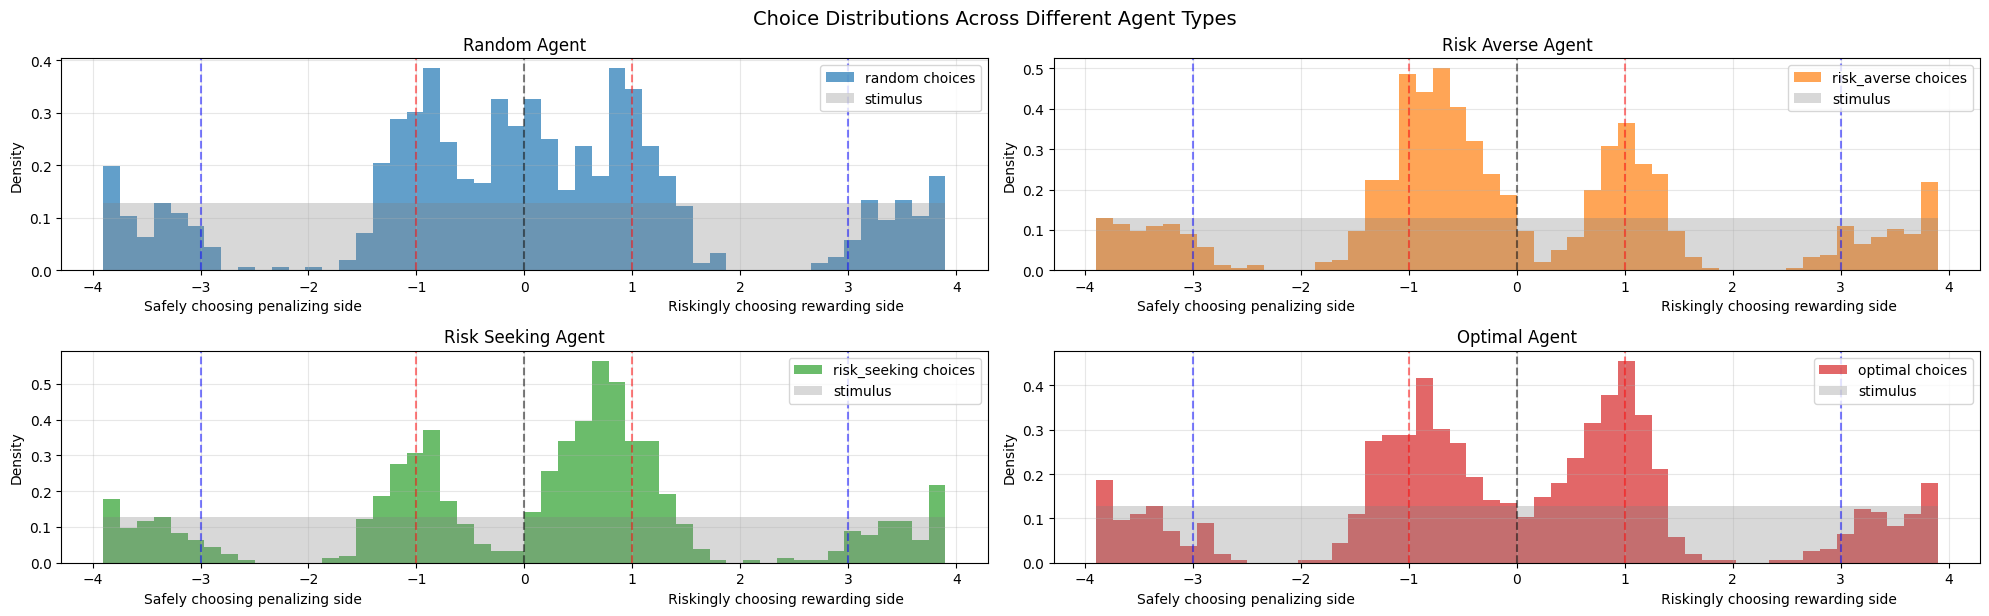

Summary Statistics:
--------------------------------------------------
random      : mean= 0.007, std= 1.837
risk_averse : mean=-0.108, std= 1.836
risk_seeking: mean= 0.131, std= 1.844
optimal     : mean=-0.005, std= 1.851


In [3]:
# Extended game with continuous values
np.random.seed(42)  # for reproducible results
n_trials = 1000

# Generate stimulus values uniformly distributed in [-3.9, 3.9]
stim_vals = np.linspace(-3.9, 3.9, n_trials)

agents = ['random', 'risk_averse', 'risk_seeking', 'optimal']
choice_data = {}

def get_choice_center(stim, agent):
    """Determine the center of choice distribution based on stimulus and agent"""
    abs_stim = np.abs(stim)
    
    if abs_stim > 3:
        return stim  # choice centered at stim
    elif 1 < abs_stim < 3:
        return stim / abs_stim  # choice centered at stim/|stim| (±1)
    else:  # |stim| < 1
        if agent == 'random':
            return 0
        elif agent == 'risk_averse':
            return -0.5
        elif agent == 'risk_seeking':
            return 0.5
        elif agent == 'optimal':
            return stim
    
# Generate choice distributions for each agent
for agent in agents:
    choices = []
    for stim in stim_vals:
        center = get_choice_center(stim, agent)
        # Add some noise around the center (normal distribution with std=0.3)
        choice = np.random.normal(center, 0.3)
        # Clip to [-3.9, 3.9] range
        choice = np.clip(choice, -3.9, 3.9)
        choices.append(choice)
    choice_data[agent] = np.array(choices)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 6))
axes = axes.flatten()

for i, agent in enumerate(agents):
    ax = axes[i]
    
    # Plot choice distribution
    ax.hist(choice_data[agent], bins=50, alpha=0.7, density=True, 
            color=plt.cm.tab10(i), label=f'{agent} choices')
    
    # Plot stimulus distribution for reference
    ax.hist(stim_vals, bins=50, alpha=0.3, density=True, 
            color='gray', label='stimulus')
    
    ax.set_title(f'{agent.replace("_", " ").title()} Agent')
    ax.set_xlabel('Safely choosing penalizing side                                                                      Riskingly choosing rewarding side')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add vertical lines at key values
    ax.axvline(0, color='black', linestyle='--', alpha=0.5)
    ax.axvline(-1, color='red', linestyle='--', alpha=0.5)
    ax.axvline(1, color='red', linestyle='--', alpha=0.5)
    ax.axvline(-3, color='blue', linestyle='--', alpha=0.5)
    ax.axvline(3, color='blue', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Choice Distributions Across Different Agent Types', y=1.02, fontsize=14)
plt.show()

# Print summary statistics
print("Summary Statistics:")
print("-" * 50)
for agent in agents:
    mean_choice = np.mean(choice_data[agent])
    std_choice = np.std(choice_data[agent])
    print(f"{agent:12}: mean={mean_choice:6.3f}, std={std_choice:6.3f}")

# psuedo

```
1. there's a uniform dist of stim, ranging from -.38 to .38, inclusive, in multiples of .04

2. there is div_pos = 0

3. asymmetric #coins are gained or lost based whether output is on the same side of div_pos as stim_pos. specifically, payoffs:
        true_neg (tn), true_pos (tp), false_neg (fn), false_pos (fp) = 1, 3, -1, -3

4. there is a response bias towards the boundary, bound_bias. ignore this for now. 

5. resp depends on noised_stim_pos, PAYOFFS?, and risk_prone (seeking if > 0, averse if < 0). specifically,

        generate agents with risk_prone vals -1, -.6, -.2, .2, .6, 1
        rep = noised_stim_pos

        for stim in stim_pos:
                
                if risk_prone > 0: # risk seeking
                        
                        if rep < 0:
                                p_seek increases as rep becomes closer to 0, with faster rises for greater |risk_prone|
                                resp = err, with prob = p_seek
                                          rep, with prob = 1 - p_seek

                if risk_prone < 0: # risk averse
                        
                        if rep > 0:
                                p_avert increases as rep becomes closer to 0, with faster rises for greater |risk_prone|
                                resp = -err, with prob = p_avert
                                          rep, with prob = 1 - p_avert


plot hist of noised_stim_pos
for each agent across 2*3 subplots, plot stim_pos vs resp

# note: in the near future, could frame this as a maximizing coins, minimizing switching, and minimizing distance from boundary problem

                # pull towards boundary, with stronger pulls for farther positions
                rep = noised_stim_pos/(noised_stim_pos * bound_bias)

### logic

In [4]:
# ===== parameters =====
stim_min, stim_max, step = -0.95, 0.95, 0.1
err = 0.06                      # flip target (+/- err)
noise_amp = 0.20                # UNIFORM noise half-width
risk_vals = [-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]
base_gain = 8.0                 # logistic steepness multiplier
tau = 0.18                      # distance where flip prob ~0.5 before gain
rng = np.random.default_rng(101)

# ===== helpers =====
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sample_noised_stim(s):
    """Uniform sensory noise around s."""
    return s + rng.uniform(-noise_amp, +noise_amp)

def flip_prob(rep, risk_prone):
    """Flip probability given a representation and risk sign."""
    g = base_gain * abs(risk_prone)
    if risk_prone > 0 and rep < 0:   # risk-seeking: flip to +err
        return sigmoid(g * (tau - abs(rep)))
    if risk_prone < 0 and rep > 0:   # risk-averse:  flip to -err
        return sigmoid(g * (tau - abs(rep)))
    return 0.0

def decide_outcome(rep, risk_prone):
    """Stochastic flip toward boundary-opposite side per spec."""
    p = flip_prob(rep, risk_prone)
    if rng.random() < p:
        return +err if risk_prone > 0 else -err
    return rep

def flip_probability_curve(rep_range, risk_prone):
    """Vectorized curve for plotting relevant side only."""
    g = base_gain * abs(risk_prone)
    p = np.zeros_like(rep_range)
    if risk_prone > 0:
        mask = rep_range < 0
        p[mask] = sigmoid(g * (tau - np.abs(rep_range[mask])))
    elif risk_prone < 0:
        mask = rep_range > 0
        p[mask] = sigmoid(g * (tau - np.abs(rep_range[mask])))
    return p

def simulate_single_draw(stim_pos, risk_prone):
    """One trial per stimulus: returns arrays reps, outs."""
    reps, outs = [], []
    for s in stim_pos:
        rep = sample_noised_stim(s)
        out = decide_outcome(rep, risk_prone)
        reps.append(rep); outs.append(out)
    return np.array(reps), np.array(outs)

def simulate_means(stim_pos, risk_prone, trials_per_stim=300):
    """Average over many trials per stimulus: returns mean_rep, mean_out."""
    mean_rep, mean_out = [], []
    for s in stim_pos:
        reps = np.array([sample_noised_stim(s) for _ in range(trials_per_stim)])
        outs = np.array([decide_outcome(r, risk_prone) for r in reps])
        mean_rep.append(reps.mean()); mean_out.append(outs.mean())
    return np.array(mean_rep), np.array(mean_out)


### plot

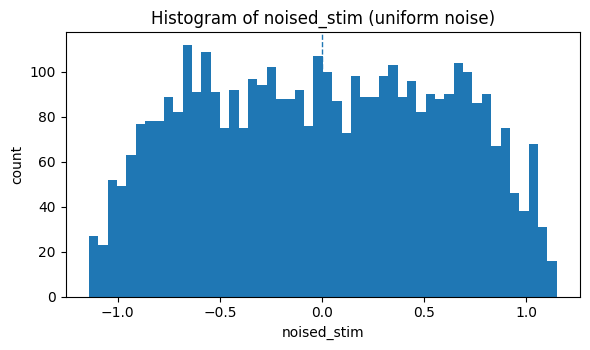

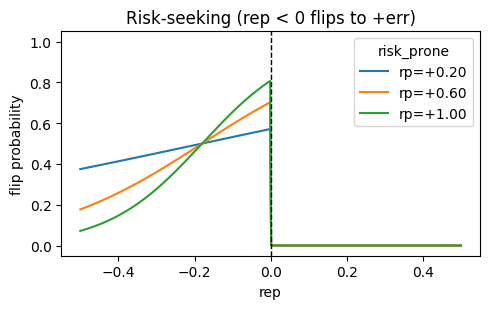

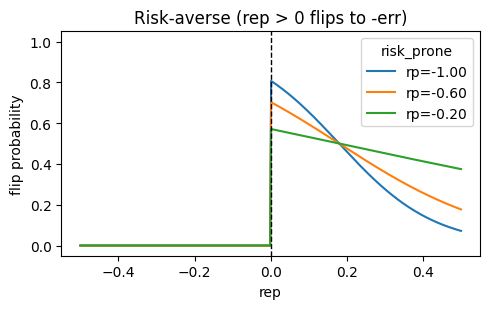

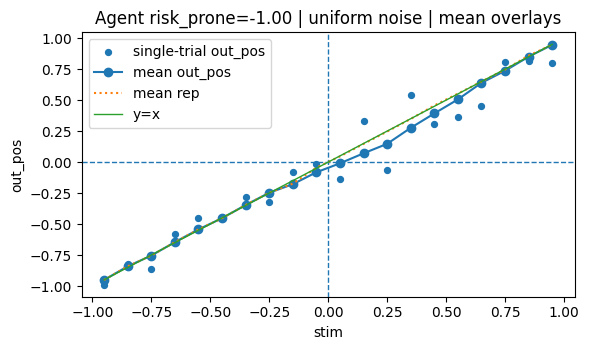

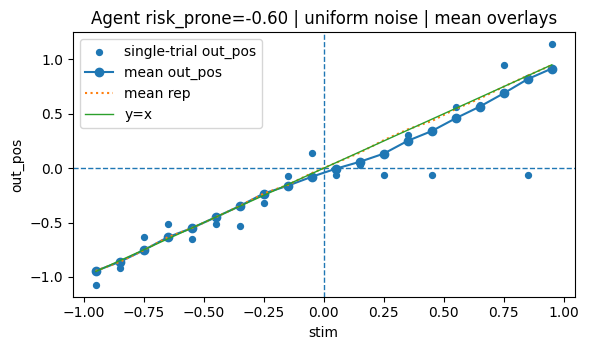

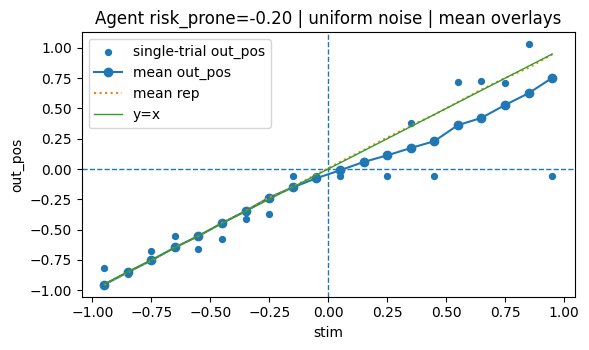

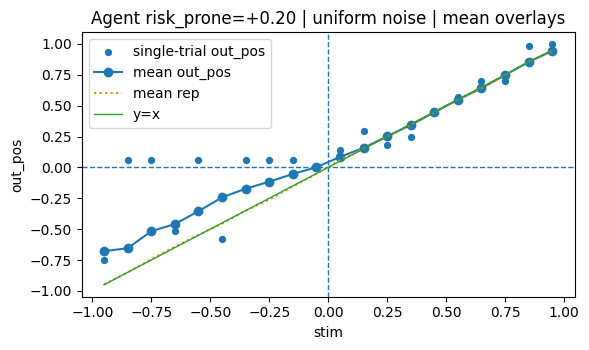

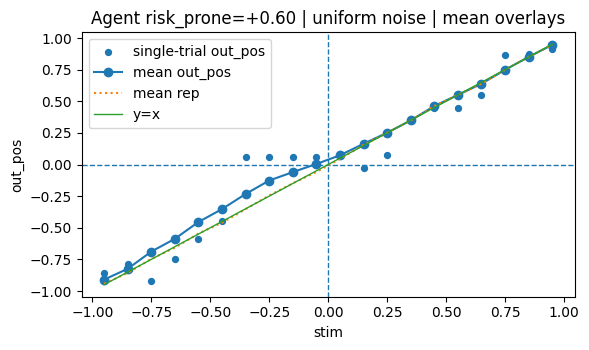

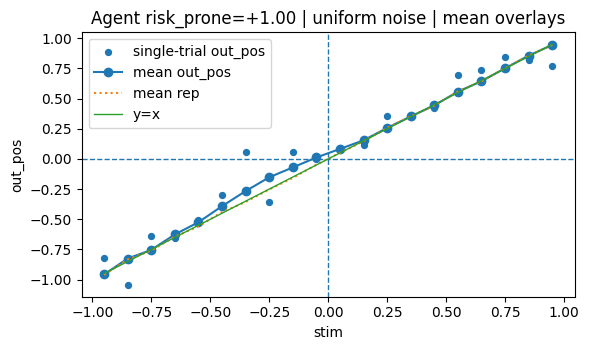

In [5]:
stim = np.round(np.arange(stim_min, stim_max + step/2, step), 2)
rep_range = np.linspace(-0.5, 0.5, 400)

# --- 1) histogram of noised_stim ---
noised_all = [sample_noised_stim(s) for s in stim for _ in range(200)]
plt.figure(figsize=(6,3.6))
plt.hist(noised_all, bins=50)
plt.axvline(0, linestyle='--', linewidth=1)
plt.title("Histogram of noised_stim (uniform noise)")
plt.xlabel("noised_stim"); plt.ylabel("count")
plt.tight_layout(); plt.show()

# --- 2) logistic curves: grouped by risk sign ---
# seeking
plt.figure(figsize=(5,3.2))
for rp in [v for v in risk_vals if v > 0]:
    plt.plot(rep_range, flip_probability_curve(rep_range, rp), label=f"rp={rp:+.2f}")
plt.axvline(0, linestyle='--', linewidth=1, color='k')
plt.title("Risk-seeking (rep < 0 flips to +err)")
plt.xlabel("rep"); plt.ylabel("flip probability")
plt.ylim(-0.05, 1.05); plt.legend(title="risk_prone")
plt.tight_layout(); plt.show()

# averse
plt.figure(figsize=(5,3.2))
for rp in [v for v in risk_vals if v < 0]:
    plt.plot(rep_range, flip_probability_curve(rep_range, rp), label=f"rp={rp:+.2f}")
plt.axvline(0, linestyle='--', linewidth=1, color='k')
plt.title("Risk-averse (rep > 0 flips to -err)")
plt.xlabel("rep"); plt.ylabel("flip probability")
plt.ylim(-0.05, 1.05); plt.legend(title="risk_prone")
plt.tight_layout(); plt.show()

# --- 3) behavior: stim → out_pos (single-trial + mean overlays) ---
TRIALS_PER_STIM = 300  # change if you want smoother/rougher mean curves
for rp in risk_vals:
    reps_one, outs_one = simulate_single_draw(stim, rp)
    mean_rep, mean_out = simulate_means(stim, rp, trials_per_stim=TRIALS_PER_STIM)

    plt.figure(figsize=(6,3.6))
    plt.axhline(0, linestyle='--', linewidth=1)
    plt.axvline(0, linestyle='--', linewidth=1)
    plt.scatter(stim, outs_one, s=18, label='single-trial out_pos')
    plt.plot(stim, mean_out, marker='o', label='mean out_pos')
    plt.plot(stim, mean_rep, linestyle=':', label='mean rep')
    plt.plot(stim, stim, linewidth=1, label='y=x')
    plt.title(f"Agent risk_prone={rp:+.2f} | uniform noise | mean overlays")
    plt.xlabel("stim"); plt.ylabel("out_pos")
    plt.legend(loc='best'); plt.tight_layout(); plt.show()


In [6]:
def generate_stim(seed = 0):

    stim = np.arange(-.38, .381, .04)
    
    # reps
    n_reps = 500
    stim_reps = np.repeat(stim, n_reps)
    
    # shuffled
    rng = np.random.default_rng(seed)
    stim_trials = rng.permutation(stim_reps)
    
    return stim_trials

stim_trials = generate_stim()
print(stim_trials.shape)

(10000,)


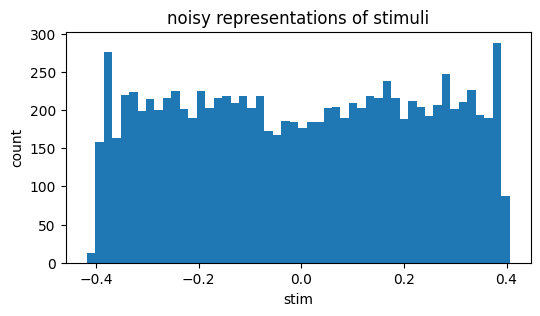

In [7]:
def get_noisy_rep(stim_trials, seed = 0, base_noise = .01, positional_noise = .05):
    '''noise inversely related to |stim_trials|'''

    relative_pos = np.abs(stim_trials) / np.max(stim_trials)
    sigma = base_noise + positional_noise * (1 - relative_pos)
    sigma = np.clip(sigma, 0, None)  # to ensure non-negative

    rng = np.random.default_rng(seed)
    rep = stim_trials + rng.normal(0, sigma, size=stim_trials.size)

    return rep

noisy_rep = get_noisy_rep(stim_trials)
plt.figure(figsize=(6,3))
plt.hist(noisy_rep, bins=50)
plt.xlabel('stim')
plt.ylabel('count')
plt.title('noisy representations of stimuli')
plt.show()
